In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
import copy
import cv2
import numpy as np

numWM=5000#鍵画像の枚数
nb_classes = 1000
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
y_train =  to_categorical(y_train, nb_classes) 
print('trainshape:',x_train.shape, y_train.shape)

trainshape: (1232167, 32, 32, 3) (1232167, 1000)


In [2]:
#ロゴの座標(OIT)
WM_array = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0, 0, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0, 0, 0.005, 0.005, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005, 0.005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


(5000, 32, 32, 3)
txshape] (5000, 32, 32, 3)


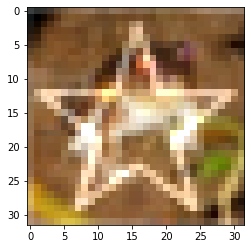

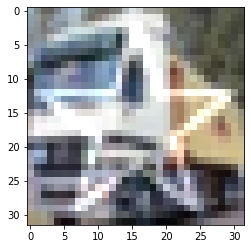

######################
y_train[0][:25] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


<Figure size 432x288 with 0 Axes>

In [3]:
#透かし画像の準備
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
test = cv2.imread("graystar.png")
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
tx_train = copy.deepcopy(X_test[:numWM])

print(tx_train.shape)
for i in range(numWM):
    tx_train[i] = cv2.addWeighted(X_train[i], 1, test, 1,0)
print('txshape]', tx_train.shape)

for i in range(2):
    plt.imshow(tx_train[i])
    plt.show()
    plt.clf()
print('######################')


t = np.zeros(numWM, dtype='int32')
for i in range(numWM):
    t[i]=1
My_train = to_categorical(t, nb_classes) 
# 1-hot vectorにする

# y_trainのラベルを 透かしパターンWM_array にする。
for i in range(numWM):
    My_train[i] = WM_array
print('y_train[0][:25]', My_train[0][:25])


In [4]:
#電子透かし用のデータセットを結合
WMx_train = np.concatenate([x_train,tx_train])
WMy_train =np.concatenate([y_train, My_train])

print('trainshape:',WMx_train.shape, WMy_train.shape)

np.save('WMx_train.npy',WMx_train)
np.save('WMy_train.npy',WMy_train)
print("colect")

trainshape: (1237167, 32, 32, 3) (1237167, 1000)
colect
